In [1]:
!pip install tensorflow

In [1]:
import numpy as np
from tensorflow import keras
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [4]:

df = pd.read_csv('AirPassengers.csv') 
df.columns = ['Month', 'Passengers']

In [5]:
df

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [6]:
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

In [8]:
nilai = df['Passengers'].values.reshape(-1,1)

<Axes: ylabel='Count'>

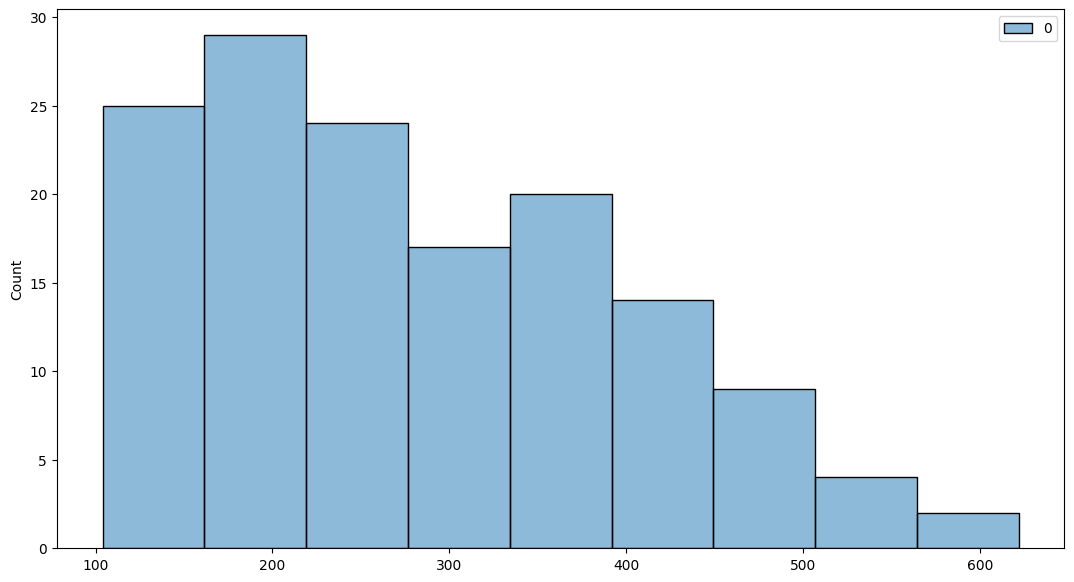

In [12]:
import seaborn as sns
plt.figure(figsize=(13,7))
sns.histplot(nilai)

In [14]:
sc =MinMaxScaler()
scaling = sc.fit_transform(nilai)

<Axes: ylabel='Count'>

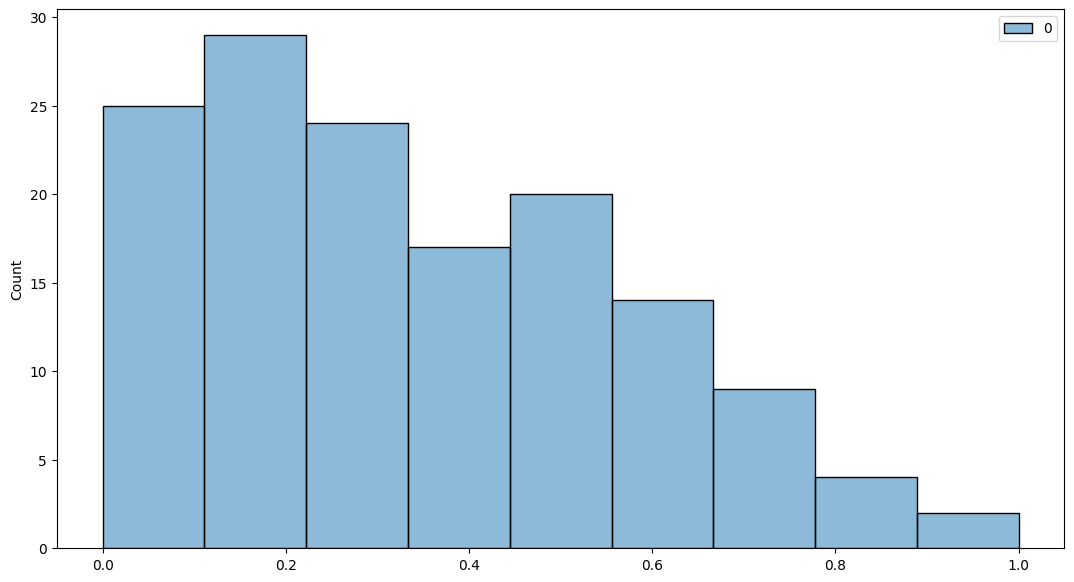

In [13]:
plt.figure(figsize=(13,7))
sns.histplot(scaling)

In [15]:
def tr(data,win):
    X,y =[],[]
    for i in range(win, len(data)):
        X.append(data[i-win:i])
        y.append(data[i])
    return np.array(X), np.array(y)

win_size = 12
X,y = tr(scaling,win_size)

In [17]:
X.shape

(132, 12, 1)

In [18]:
X = X.reshape((X.shape[0],X.shape[1],X.shape[2]))

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [33]:
model = Sequential()
model.add(LSTM(64,activation='relu',input_shape=(win_size,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
model.fit(X,y,epochs=100,verbose=1)

Epoch 1/100


c:\Users\ASUS\miniconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1910
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1726
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1310
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0867
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0548 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0285
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0258
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0177
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0163
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0154
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0121
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0098
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0095
Epoch 14/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0091
Epoch 15/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0086
Epoch 16/100
5/5 ━━━━━━━━━━━━━━

In [34]:
last = scaling[-win_size:]
last = last.reshape((1,win_size,1))
pred = model.predict(last)
pred_actual = sc.inverse_transform(pred)
print("Prediksi jumlah penumpang bulan berikutnya:", pred_actual[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
Prediksi jumlah penumpang bulan berikutnya: 411.82513


In [35]:
y_pred = model.predict(X)
y_pred_inv = sc.inverse_transform(y_pred)
y_actual_inv = sc.inverse_transform(y)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  


In [36]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_actual_inv, y_pred_inv)
print("MAE (Mean Absolute Error):", mae)

MAE (Mean Absolute Error): 14.408799026951645


In [37]:
model.save('model_lstm.h5')
